V3: This notebook will have different models to answer different questions

1. What is the zip code with the higher house prices? 
* This model will have the testing data separated from training data


## Final Project Submission

Please fill out:
* Student name: Francis Morales
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Pablo Crespo
* Blog post URL:


In [1]:
#Make notebook wider
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

# 1. Inspecting, Cleaning and Preparing the Dataset

## 1.1 Use the dataframe.info(), dataframe.describe(), dataframe.isna() methods and print unique values to get an inital sense of the data. Remove duplicate data.

* ['waterfront', 'view', 'yr_renovated'] --> missing values, need to inspect further
* ['date', 'sqft_basement'] --> are saved as object, might have to convert to a different value_type
* ['waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated'] --> Might be able to convert those variables to categories
* 177 rows with duplicate data were identified and removed from dataset.

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('kc_house_data.csv')

In [3]:
#Check for duplicated data
duplicates = df[df.duplicated(subset='id')]
print(len(duplicates))

177


In [4]:
df.drop_duplicates(subset='id', keep='first', inplace=True)
#Check the new number of rows
df['id'].count()

21420

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
id               21420 non-null int64
date             21420 non-null object
price            21420 non-null float64
bedrooms         21420 non-null int64
bathrooms        21420 non-null float64
sqft_living      21420 non-null int64
sqft_lot         21420 non-null int64
floors           21420 non-null float64
waterfront       19067 non-null float64
view             21357 non-null float64
condition        21420 non-null int64
grade            21420 non-null int64
sqft_above       21420 non-null int64
sqft_basement    21420 non-null object
yr_built         21420 non-null int64
yr_renovated     17616 non-null float64
zipcode          21420 non-null int64
lat              21420 non-null float64
long             21420 non-null float64
sqft_living15    21420 non-null int64
sqft_lot15       21420 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.6+ MB


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142000e+04,2.142000e+04,21420.000000,21420.000000,21420.000000,2.142000e+04,21420.000000,19067.000000,21357.000000,21420.000000,21420.000000,21420.000000,21420.000000,17616.000000,21420.00000,21420.000000,21420.000000,21420.000000,21420.000000
mean,4.580940e+09,5.407393e+05,3.373950,2.118429,2083.132633,1.512804e+04,1.495985,0.007657,0.234677,3.410784,7.662792,1791.170215,1971.092997,83.847241,98077.87437,47.560197,-122.213784,1988.384080,12775.718161
std,2.876761e+09,3.679311e+05,0.925405,0.768720,918.808412,4.153080e+04,0.540081,0.087172,0.766459,0.650035,1.171971,828.692965,29.387141,400.436625,53.47748,0.138589,0.140791,685.537057,27345.621867
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.00000,47.155900,-122.519000,399.000000,651.000000
25%,2.123537e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,0.000000,98033.00000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.00000,47.572100,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069050e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,1997.000000,0.000000,98117.00000,47.678100,-122.125000,2370.000000,10086.250000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.00000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
#Check the number of NaNs in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
#Examine the unique values in each column to look for placeholders or unlikely data
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(10), '\n')

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
2592400250    0.000047
6772200055    0.000047
9808700025    0.000047
2595650170    0.000047
2423059067    0.000047
Name: id, dtype: float64 

date 
 6/23/2014     0.006629
6/25/2014     0.006116
6/26/2014     0.006116
7/8/2014      0.005929
4/27/2015     0.005882
3/25/2015     0.005696
7/9/2014      0.005649
4/14/2015     0.005602
6/24/2014     0.005556
10/28/2014    0.005462
Name: date, dtype: float64 

price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
325000.0    0.006863
400000.0    0.006769
375000.0    0.006443
525000.0    0.006116
300000.0    0.006116
Name: price, dtype: float64 

bedrooms 
 3     0.454295
4     0.319748
2     0.127731
5     0.074043
6     0.012372
1     0.008917
7     0.001774
8     0.000607
9     0.000280
10    0.000140
Name: bedrooms, dtype: float64 

bathrooms 
 2.50    0.249860
1

## 1.2 Further inspect the data looking for NaNs and placeholder values. Apply data cleaning procedures described in notes below. Convert variables to appropriate data types.

* ['waterfront']: median = 0 // 99% of the houses with data have ['waterfront'] = 0; therefore, for the NaNs in this variable, I will be assigning ['waterfront'] = 0
* ['view']: median = 0 // 90% of the houses with data have ['view']= 0; therefore, I will be assigning ['view'] = 0 to the NaNs in this variable.
* ['yr_renovated']: median = 0 // 95.7% of the houses with data have ['yr_renovated'] = 0; therefore, for the NaNs in this variable I will be assigning ['yr_renovated'] = 0
* ['yr_renovated']: will transform this variable into a categorical one where ['yr_renovated']=0 if not renovated and ['yr_renovated']=1 if renovated -- this based on 95% of houses have never been renovated and makes more sense to transform to a category
* ['sqft_basement'] has a placeholder "?" representing 2% of the total values. Will calculate the median value of the houses with data and will replace with the calculated median value.
* Data Type transformation:
        -['date']: apply pandas.to_datetime
        -['waterfront', 'yr_renovated', 'zipcode', 'view', 'condition', 'grade']: change to category

In [9]:
#Handling NaNs
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#Handling placeholder value in 'sqft_basement'
df2 = df.loc[df['sqft_basement'] != '?'].copy()
df2['sqft_basement'] = pd.to_numeric(df2['sqft_basement'])
median1 = df2['sqft_basement'].median()
df['sqft_basement'].loc[df['sqft_basement'] == '?'] = median1
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

#Converting values != 0 into 1 for 'yr_renovated'
df['yr_renovated'].loc[df['yr_renovated'] != 0] = 1

#Handling data type in date
df['date'] = pd.to_datetime(df['date'])
df['zipcode'] = df['zipcode'].astype('category')
df['waterfront'] = df['waterfront'].astype('category')
df['yr_renovated'] = df['yr_renovated'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [10]:
#yr_built
bins = [1900, 1952, 1975, 1997, 2015]
bins_yr_built = pd.cut(df['yr_built'], bins)
bins_yr_built = bins_yr_built.cat.as_unordered()

yr_built_dummies = pd.get_dummies(bins_yr_built, prefix='yr_built')

In [11]:
df = df.drop(['yr_built'], axis=1)
df = pd.concat([df, yr_built_dummies], axis=1)
df = df.drop(['yr_built_(1900, 1952]'], axis=1) #to avoid multicollinearity

# 2. Building Regression Model

Business questions to explain:

               1) Does school district ranking have relation with house appraisal?
               2) What are the school districts with better house appraisal?
               3) What is more influential in the appraisal of a house: sqft lot OR sqft living?

*Please note that initial business questions 1 & 2 were different but Model 1 was overfitting, therefore a different approach was followed for the final Model (see original questions below):

               1) Do zip code areas have relation with house appraisal?
               2) What are the zip codes with better house appraisal?


## 2.1  Model 1: Using dummy variables for each zipcode

### 2.1.1 Preparing Dataframe for Model 1

Washington State King County has 85 different zipcodes. For Model 1 a dummy variable will be created for each zipcode.

![King_County_ZipcodeMap.PNG](King_County_ZipcodeMap.PNG)

In [12]:
#Create dummies for each zip code
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix='zipcode')

In [13]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model = df[['price', 'sqft_lot', 'sqft_living']].copy()
df_model = pd.concat([df_model, zipcode_dummies], axis=1) 
df_model = df_model.drop(['zipcode_98039'], axis=1) #dropped the zipcode with lowest data available since we created categories

### 2.1.2 Train/test split

*  Use Scikit-Learn library:  train_test_split method to train/test split our dataset

In [14]:
y = df_model['price']
x= df_model.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 71) (17136,)
(4284, 71) (4284,)


C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### 2.1.3 Generate Model1 and perform feature engineering

#### Model 1 - V1

Generate version1 of Model1

In [15]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     666.1
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:13:20   Log-Likelihood:            -2.3266e+05
No. Observations:               17136   AIC:                         4.655e+05
Df Residuals:                   17064   BIC:                         4.660e+05
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.182e+06   3.02e+04     39.082      0.000    1.12e+06    1.24e+06
sqft_lot          0.2617      0.038      6.837      0.000       0.187       0.337
sqft_living     252.8898      1.780    142.102      0.000     249.402     256.378
zipcode_98001 -1.387e+06   3.18e+04    -43.674      0.000   -1.45e+06   -1.32e+06
zipcode_98002 -1.359e+06   3.38e+04    -40.200      0.000   -1.43e+06   -1.29e+06
zipcode_98003 -1.372e+06   3.24e+04    -42.393      0.000   -1.44e+06   -1.31e+06
zipcode_98004 -5.493e+05   3.18e+04    -17.272      0.000   -6.12e+05   -4.87e+05
zipcode_98005 -1.052e+06   3.37e+04    -31.219      0.000   -1.12e+06   -9.86e+05
zipcode_98006 -1.068e+06   3.11e+04    -34.378      0.000   -1.13e+06   -1.01e+06
zipcode_98007  -1.12e+06   3.46e+04    -32.402      0.000   -1.19e+06   -1.05e+06
zipcode_98008 -1.076e+06   3.22e+04    -33.461      0.000   -1.14e+06   -1.01e+06
zipcode_98010 -1.312e+06   3.69e+04    -35.546      0.000   -1.38e+06   -1.24e+06
zipcode_98011 -1.265e+06   3.34e+04    -37.873      0.000   -1.33e+06    -1.2e+06
zipcode_98014 -1.287e+06   3.56e+04    -36.104      0.000   -1.36e+06   -1.22e+06
zipcode_98019 -1.315e+06   3.35e+04    -39.254      0.000   -1.38e+06   -1.25e+06
zipcode_98022 -1.353e+06   3.29e+04    -41.112      0.000   -1.42e+06   -1.29e+06
zipcode_98023 -1.403e+06   3.12e+04    -45.006      0.000   -1.46e+06   -1.34e+06
zipcode_98024 -1.213e+06   3.86e+04    -31.478      0.000   -1.29e+06   -1.14e+06
zipcode_98027 -1.214e+06   3.14e+04    -38.734      0.000   -1.28e+06   -1.15e+06
zipcode_98028 -1.262e+06   3.23e+04    -39.087      0.000   -1.33e+06    -1.2e+06
zipcode_98029 -1.149e+06   3.19e+04    -35.995      0.000   -1.21e+06   -1.09e+06
zipcode_98030 -1.387e+06   3.25e+04    -42.690      0.000   -1.45e+06   -1.32e+06
zipcode_98031 -1.373e+06   3.24e+04    -42.373      0.000   -1.44e+06   -1.31e+06
zipcode_98032 -1.381e+06   3.54e+04    -39.049      0.000   -1.45e+06   -1.31e+06
zipcode_98033 -9.992e+05   3.13e+04    -31.918      0.000   -1.06e+06   -9.38e+05
zipcode_98034 -1.158e+06   3.11e+04    -37.266      0.000   -1.22e+06    -1.1e+06
zipcode_98038 -1.364e+06   3.09e+04    -44.082      0.000   -1.42e+06    -1.3e+06
zipcode_98040 -7.652e+05   3.21e+04    -23.850      0.000   -8.28e+05   -7.02e+05
zipcode_98042 -1.382e+06    3.1e+04    -44.503      0.000   -1.44e+06   -1.32e+06
zipcode_98045 -1.282e+06    3.3e+04    -38.811      0.000   -1.35e+06   -1.22e+06
zipcode_98052 -1.136e+06   3.09e+04    -36.735      0.000    -1.2e+06   -1.08e+06
zipcode_98053 -1.177e+06   3.14e+04    -37.474      0.000   -1.24e+06   -1.12e+06
zipcode_98055 -1.337e+06   3.27e+04    -40.922      0.000    -1.4e+06   -1.27e+06
zipcode_98056 -1.268e+06   3.15e+04    -40.293      0.000   -1.33e+06   -1.21e+06
zipcode_98058 -1.353e+06   3.13e+04    -43.193   

Plot residuals of version1 to see if they follow a normal distribution

In [16]:
version1_resid = linreg.resid

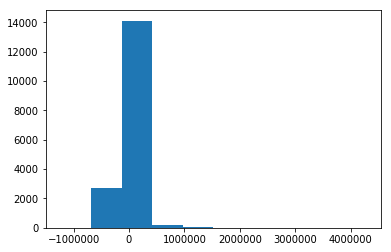

In [17]:
#Histogram of residuals
plt.hist(version1_resid)
plt.show()

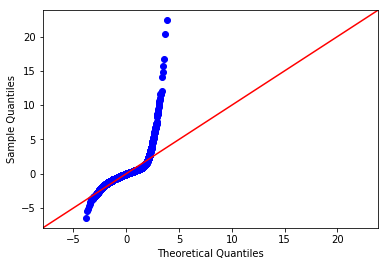

In [18]:
#QQ Plot of residuals
sm.graphics.qqplot(version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 1 conclusion:
        -This model was built on training data without transformation
        -Residuals do not follow a normal distribution as confirmed by qq plot, therefore this is not a reliable Model and need to try some transformations to normalize residuals



#### Model 1 - V2

Will transform variables to see if residuals normalize

In [19]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

Check multicollinearity after normalization: no multicollinearity found between independent variables

In [20]:
X.corr() > 0.75

,const,sqft_lot,sqft_living,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
const,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98001,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98002,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98003,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98004,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98005,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98006,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
zipcode_98007,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


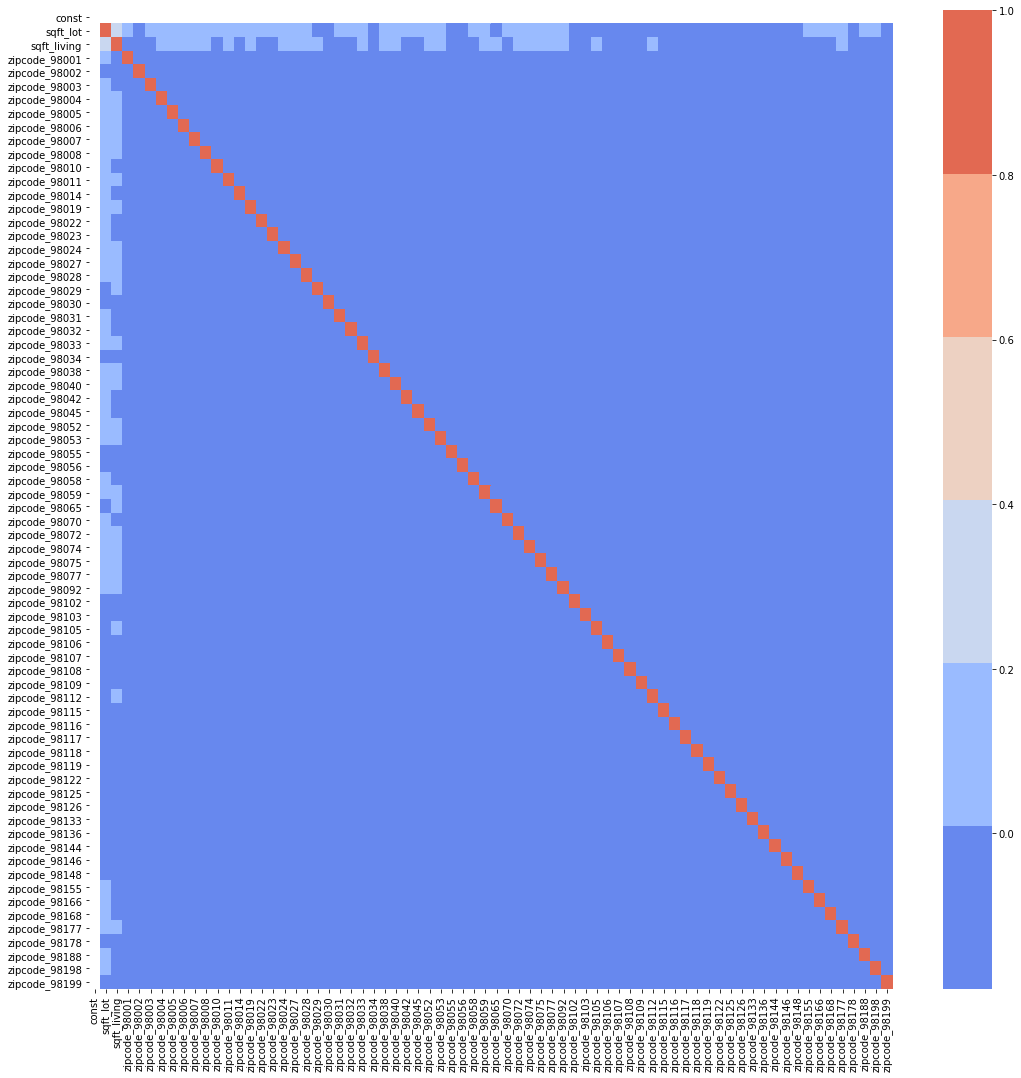

In [21]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

Generate version2 of model

In [22]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1158.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:13:28   Log-Likelihood:                 1774.8
No. Observations:               17136   AIC:                            -3406.
Df Residuals:                   17064   BIC:                            -2848.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0236      0.051    157.561      0.000       7.924       8.123
sqft_lot          0.0689      0.002     28.435      0.000       0.064       0.074
sqft_living       0.7080      0.005    156.180      0.000       0.699       0.717
zipcode_98001    -1.4779      0.036    -40.773      0.000      -1.549      -1.407
zipcode_98002    -1.4880      0.039    -38.542      0.000      -1.564      -1.412
zipcode_98003    -1.4201      0.037    -38.425      0.000      -1.493      -1.348
zipcode_98004    -0.2281      0.036     -6.273      0.000      -0.299      -0.157
zipcode_98005    -0.6733      0.039    -17.479      0.000      -0.749      -0.598
zipcode_98006    -0.7007      0.036    -19.723      0.000      -0.770      -0.631
zipcode_98007    -0.7674      0.039    -19.435      0.000      -0.845      -0.690
zipcode_98008    -0.7499      0.037    -20.423      0.000      -0.822      -0.678
zipcode_98010    -1.2445      0.042    -29.520      0.000      -1.327      -1.162
zipcode_98011    -1.0034      0.038    -26.301      0.000      -1.078      -0.929
zipcode_98014    -1.1760      0.041    -28.985      0.000      -1.256      -1.096
zipcode_98019    -1.1602      0.038    -30.342      0.000      -1.235      -1.085
zipcode_98022    -1.3858      0.037    -36.969      0.000      -1.459      -1.312
zipcode_98023    -1.4682      0.036    -41.269      0.000      -1.538      -1.398
zipcode_98024    -1.0379      0.044    -23.590      0.000      -1.124      -0.952
zipcode_98027    -0.9134      0.036    -25.512      0.000      -0.984      -0.843
zipcode_98028    -1.0412      0.037    -28.239      0.000      -1.113      -0.969
zipcode_98029    -0.7755      0.037    -21.244      0.000      -0.847      -0.704
zipcode_98030    -1.4185      0.037    -38.234      0.000      -1.491      -1.346
zipcode_98031    -1.3928      0.037    -37.654      0.000      -1.465      -1.320
zipcode_98032    -1.4855      0.040    -36.780      0.000      -1.565      -1.406
zipcode_98033    -0.6150      0.036    -17.194      0.000      -0.685      -0.545
zipcode_98034    -0.8939      0.035    -25.207      0.000      -0.963      -0.824
zipcode_98038    -1.2880      0.035    -36.468      0.000      -1.357      -1.219
zipcode_98040    -0.4095      0.037    -11.158      0.000      -0.481      -0.338
zipcode_98042    -1.3946      0.035    -39.358      0.000      -1.464      -1.325
zipcode_98045    -1.1407      0.038    -30.253      0.000      -1.215      -1.067
zipcode_98052    -0.7733      0.035    -21.887      0.000      -0.843      -0.704
zipcode_98053    -0.8397      0.036    -23.399      0.000      -0.910      -0.769
zipcode_98055    -1.3250      0.037    -35.504      0.000      -1.398      -1.252
zipcode_98056    -1.1073      0.036    -30.807      0.000      -1.178      -1.037
zipcode_98058    -1.2915      0.036    -36.128   

Plot residuals of version2 to see if they follow a normal distribution

In [23]:
version2_resid = linreg.resid

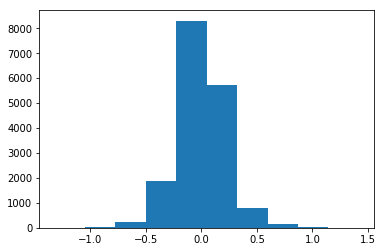

In [24]:
#Histogram of residuals
plt.hist(version2_resid)
plt.show()

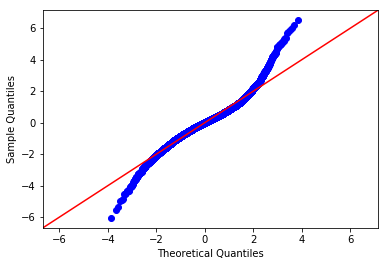

In [25]:
#QQ Plot of residuals
sm.graphics.qqplot(version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 2 concusion:
      -Log transformed my continuous variables to help normalize residual distr and get a better kurtosis/JB 
      -Confirmed that there is no multicollinearity between independent variables after transformation
      -QQ plot showed a better normal distribution of residuals compared to version 1 BUT distribution is still not normal; therefore, model is not reliable

#### Model 1 - V3

Will do stepwise regression and see if residual distribution gets better

In [26]:
#Model Fit: Stepwise Regression
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [27]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  const                          with p-value 0.0
Add  zipcode_98004                  with p-value 8.38095e-192
Add  zipcode_98023                  with p-value 2.1766e-164
Add  zipcode_98042                  with p-value 7.62126e-141
Add  zipcode_98001                  with p-value 2.40809e-138
Add  zipcode_98112                  with p-value 5.76335e-119
Add  zipcode_98092                  with p-value 1.82764e-116
Add  zipcode_98038                  with p-value 6.41608e-125
Add  zipcode_98003                  with p-value 1.23375e-107
Add  zipcode_98030                  with p-value 8.8313e-113
Add  zipcode_98058                  with p-value 8.08958e-113
Add  zipcode_98031                  with p-value 1.23513e-117
Add  zipcode_98168                  with p-value 7.32287e-117
Add  zipcode_98002                  with p-value 5.6717e-122
Add  zipcode_98198                  with p-value 4.14037e-118
Add  zipcode_98040           

C:\Users\franc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


Drop zipcode_98052                  with p-value 0.262072
Add  zipcode_98053                  with p-value 5.86768e-07
Drop zipcode_98008                  with p-value 0.103225
Add  zipcode_98126                  with p-value 5.24663e-08
Add  zipcode_98074                  with p-value 1.24697e-07
Add  zipcode_98052                  with p-value 0.00676378
Add  zipcode_98075                  with p-value 0.00108502
Drop zipcode_98144                  with p-value 0.110826
Add  zipcode_98029                  with p-value 1.1338e-05
Drop zipcode_98006                  with p-value 0.787072
Add  zipcode_98177                  with p-value 4.39764e-06
Drop zipcode_98005                  with p-value 0.385255
Add  zipcode_98008                  with p-value 4.72764e-06
Drop zipcode_98136                  with p-value 0.698232
Add  zipcode_98007                  with p-value 2.22834e-06
Add  zipcode_98006                  with p-value 2.09393e-05
Drop zipcode_98033                  with p-va

In [28]:
feature_list = ['const', 'sqft_living', 'zipcode_98023', 'zipcode_98042', 'zipcode_98001', 'zipcode_98092', 'zipcode_98038', 'zipcode_98002', 'zipcode_98003', 'zipcode_98058', 'zipcode_98030', 'zipcode_98031', 'zipcode_98168', 'zipcode_98198', 'zipcode_98055', 'zipcode_98032', 'zipcode_98178', 'zipcode_98022', 'zipcode_98188', 'zipcode_98056', 'zipcode_98059', 'zipcode_98146', 'zipcode_98106', 'zipcode_98115', 'zipcode_98033', 'zipcode_98109', 'sqft_lot', 'zipcode_98019', 'zipcode_98045', 'zipcode_98148', 'zipcode_98010', 'zipcode_98014', 'zipcode_98166', 'zipcode_98155', 'zipcode_98108', 'zipcode_98065', 'zipcode_98028', 'zipcode_98133', 'zipcode_98118', 'zipcode_98011', 'zipcode_98070', 'zipcode_98072', 'zipcode_98077', 'zipcode_98024', 'zipcode_98034', 'zipcode_98027', 'zipcode_98125', 'zipcode_98053', 'zipcode_98126', 'zipcode_98074', 'zipcode_98075', 'zipcode_98052', 'zipcode_98177', 'zipcode_98029', 'zipcode_98008', 'zipcode_98007', 'zipcode_98006', 'zipcode_98144', 'zipcode_98136', 'zipcode_98005', 'zipcode_98116', 'zipcode_98117', 'zipcode_98103', 'zipcode_98122', 'zipcode_98107', 'zipcode_98199', 'zipcode_98040', 'zipcode_98105', 'zipcode_98119', 'zipcode_98102', 'zipcode_98112', 'zipcode_98004']

In [29]:
X = X[feature_list].copy()

In [30]:
#Generate model #3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     1158.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:17:21   Log-Likelihood:                 1774.8
No. Observations:               17136   AIC:                            -3406.
Df Residuals:                   17064   BIC:                            -2848.
Df Model:                          71                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.0236      0.051    157.561      0.000       7.924       8.123
sqft_living       0.7080      0.005    156.180      0.000       0.699       0.717
zipcode_98023    -1.4682      0.036    -41.269      0.000      -1.538      -1.398
zipcode_98042    -1.3946      0.035    -39.358      0.000      -1.464      -1.325
zipcode_98001    -1.4779      0.036    -40.773      0.000      -1.549      -1.407
zipcode_98092    -1.4223      0.036    -39.241      0.000      -1.493      -1.351
zipcode_98038    -1.2880      0.035    -36.468      0.000      -1.357      -1.219
zipcode_98002    -1.4880      0.039    -38.542      0.000      -1.564      -1.412
zipcode_98003    -1.4201      0.037    -38.425      0.000      -1.493      -1.348
zipcode_98058    -1.2915      0.036    -36.128      0.000      -1.362      -1.221
zipcode_98030    -1.4185      0.037    -38.234      0.000      -1.491      -1.346
zipcode_98031    -1.3928      0.037    -37.654      0.000      -1.465      -1.320
zipcode_98168    -1.4279      0.037    -38.268      0.000      -1.501      -1.355
zipcode_98198    -1.3575      0.037    -36.674      0.000      -1.430      -1.285
zipcode_98055    -1.3250      0.037    -35.504      0.000      -1.398      -1.252
zipcode_98032    -1.4855      0.040    -36.780      0.000      -1.565      -1.406
zipcode_98178    -1.2991      0.037    -34.861      0.000      -1.372      -1.226
zipcode_98022    -1.3858      0.037    -36.969      0.000      -1.459      -1.312
zipcode_98188    -1.3940      0.040    -35.122      0.000      -1.472      -1.316
zipcode_98056    -1.1073      0.036    -30.807      0.000      -1.178      -1.037
zipcode_98059    -1.0953      0.036    -30.750      0.000      -1.165      -1.025
zipcode_98146    -1.1540      0.037    -31.176      0.000      -1.227      -1.081
zipcode_98106    -1.0998      0.037    -30.088      0.000      -1.171      -1.028
zipcode_98115    -0.6035      0.035    -17.021      0.000      -0.673      -0.534
zipcode_98033    -0.6150      0.036    -17.194      0.000      -0.685      -0.545
zipcode_98109    -0.3219      0.041     -7.812      0.000      -0.403      -0.241
sqft_lot          0.0689      0.002     28.435      0.000       0.064       0.074
zipcode_98019    -1.1602      0.038    -30.342      0.000      -1.235      -1.085
zipcode_98045    -1.1407      0.038    -30.253      0.000      -1.215      -1.067
zipcode_98148    -1.3133      0.046    -28.340      0.000      -1.404      -1.222
zipcode_98010    -1.2445      0.042    -29.520      0.000      -1.327      -1.162
zipcode_98014    -1.1760      0.041    -28.985      0.000      -1.256      -1.096
zipcode_98166    -1.0906      0.037    -29.381      0.000      -1.163      -1.018
zipcode_98155    -1.0174      0.036    -28.363      0.000      -1.088      -0.947
zipcode_98108    -1.0915      0.038    -28.449   

In [31]:
version3_resid = linreg.resid

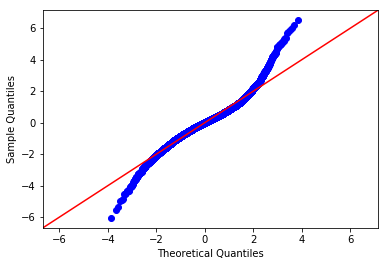

In [32]:
#QQ Plot of residuals
sm.graphics.qqplot(version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

* Model 1 - version 3 conclusion:
         -Applied Model Fit: Stepwise selection. Same model as version2 resulted after running Stepwise selection
         -Residuals do not follow a normal distribution, therefore, model is not reliable
       

### 2.1.4 Test Model

In [33]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [34]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [35]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [36]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.04759527189607495
Test Mean Squarred Error: 114.83324194032691


### 2.1.5 Conclusions: Model 1

 In general, eventhough R-squared and Adjusted R-squared showed good numbers (0.827), Model 1 QQ plots were not satisfactory (residuals are very far from following a normal distribution). 
 
 Also, the difference of the Mean Squared Error between train data and test data is big, therefore Model 1 is overfitting and not reliable. The reason for the overfit could potentially be due to the big number of different zipcodes and each one of them having a separate dummy variable.
 
**Train Mean Squarred Error:** 0.04825382071143869

**Test Mean Squarred Error:** 115.4504831237798


         

## 2.2 Model 2: Using dummy variables for each school district 

### 2.2.1 Preparing dataframe for Model 2

Model 2 will use School Districts to perform analysis. School Districts were obtained based on Zipcode from original dataframe

1. Got the city name and zip code from this webpage: https://www.bestplaces.net/find/zip.aspx?county=53033&st=WA
2. Got King County School Districts from this webpage: https://www.kingcounty.gov/~/media/depts/elections/elections/maps/school-district-maps/school-districts.ashx?la=en
3. Put together "Schooldistrictcsv.csv" file to retrieve School District based on Zip Code. This file can be found in my GitHub repository

![King_County_School_Dist.PNG](King_County_School_Dist.PNG)

In [37]:
#Create a copy of dataframe to work on Model 2
df2 = df.copy()

Import Schooldistrictcsv.csv data to a pandas dataframe, prepare data and merge into the main dataframe for Model 2

In [38]:
#import data from csv file containing school district distribution based on zipcode
df_SchoolDist = pd.read_csv('Schooldistrictcsv.csv')

In [39]:
#Rename column from imported dataframe to match the main dataframe colum name for the merge
df_SchoolDist.rename(columns={"Zip_code": "zipcode"}, inplace=True)

In [40]:
#Change data type on df_SchoolDist before merging
df_SchoolDist['zipcode'] = df_SchoolDist['zipcode'].astype('category')
df_SchoolDist['School_District'] = df_SchoolDist['School_District'].astype('category')
df_SchoolDist['City'] = df_SchoolDist['City'].astype('category')

In [41]:
#Merge dataframes to have School District incorporated in main dataframe
df3 = df2.merge(df_SchoolDist, on='zipcode')

In [42]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21419
Data columns (total 25 columns):
id                       21420 non-null int64
date                     21420 non-null datetime64[ns]
price                    21420 non-null float64
bedrooms                 21420 non-null int64
bathrooms                21420 non-null float64
sqft_living              21420 non-null int64
sqft_lot                 21420 non-null int64
floors                   21420 non-null float64
waterfront               21420 non-null category
view                     21420 non-null category
condition                21420 non-null category
grade                    21420 non-null category
sqft_above               21420 non-null int64
sqft_basement            21420 non-null float64
yr_renovated             21420 non-null category
zipcode                  21420 non-null int64
lat                      21420 non-null float64
long                     21420 non-null float64
sqft_living15            21

In [43]:
df3.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,"yr_built_(1952, 1975]","yr_built_(1975, 1997]","yr_built_(1997, 2015]",City,School_District
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0.0,0.0,...,98178,47.5112,-122.257,1340,5650,1,0,0,Bryn Mawr-Skyway,Renton
1,4060000240,2014-06-23,205425.0,2,1.0,880,6780,1.0,0.0,0.0,...,98178,47.5009,-122.248,1190,6780,0,0,0,Bryn Mawr-Skyway,Renton


In [44]:
#Create dummies for each School District
School_District_dummies = pd.get_dummies(df3['School_District'], prefix='SchDist')

### 2.2.2 Generate Model 2 and perform feature engineering

#### Model 2 - V1

In [45]:
#Select the dataframe for Q1 Model 2: dummy variables for every School District
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
#dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) 

In [46]:
#Train/test split data
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 20) (17136,)
(4284, 20) (4284,)


In [47]:
#Generate version1
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     1661.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:17:23   Log-Likelihood:            -2.3536e+05
No. Observations:               17136   AIC:                         4.708e+05
Df Residuals:                   17116   BIC:                         4.709e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                     -7.711e+04   4713.207    -16.361      0.000   -8.64e+04   -6.79e+04
sqft_lot                      0.2330      0.045      5.229      0.000       0.146       0.320
sqft_living                 272.8717      1.982    137.677      0.000     268.987     276.757
SchDist_Auburn            -1.753e+05   1.05e+04    -16.684      0.000   -1.96e+05   -1.55e+05
SchDist_Bellevue           2.857e+05   6845.911     41.735      0.000    2.72e+05    2.99e+05
SchDist_Enumclaw          -1.183e+05   1.34e+04     -8.809      0.000   -1.45e+05    -9.2e+04
SchDist_Federal Way       -1.564e+05   6815.829    -22.951      0.000    -1.7e+05   -1.43e+05
SchDist_Highline          -3.867e+04   9175.361     -4.214      0.000   -5.67e+04   -2.07e+04
SchDist_Issaquah           2.962e+04   9218.418      3.213      0.001    1.15e+04    4.77e+04
SchDist_Kent              -1.505e+05   6295.118    -23.907      0.000   -1.63e+05   -1.38e+05
SchDist_Lake Washington    7.697e+04   5255.474     14.646      0.000    6.67e+04    8.73e+04
SchDist_Mercer Island      4.195e+05   1.45e+04     29.023      0.000    3.91e+05    4.48e+05
SchDist_Northshore        -2.969e+04   8068.713     -3.680      0.000   -4.55e+04   -1.39e+04
SchDist_Renton            -8.402e+04   6893.420    -12.189      0.000   -9.75e+04   -7.05e+04
SchDist_Riveview          -8.733e+04   1.36e+04     -6.405      0.000   -1.14e+05   -6.06e+04
SchDist_Seattle            1.735e+05   3916.561     44.295      0.000    1.66e+05    1.81e+05
SchDist_Shoreline          5.158e+04   9169.584      5.626      0.000    3.36e+04    6.96e+04
SchDist_Snoqualmie Valley -7.561e+04   9917.763     -7.624      0.000    -9.5e+04   -5.62e+04
SchDist_Tahoma            -1.498e+05   1.01e+04    -14.809      0.000    -1.7e+05    -1.3e+05
SchDist_Tukwila           -8.477e+04   1.47e+04     -5.755      0.000   -1.14e+05   -5.59e+04
SchDist_Vashon Island       3.64e+04   2.16e+04      1.682      0.093   -6017.537    7.88e+04
==============================================================================
Omnibus:                    15274.202   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1372506.951
Skew:                           3.907   Prob(JB):                         0.00
Kurtosis:                      46.142   Cond. No.                     3.79e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.27e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Plot residuals of version1 to see if they follow a normal distribution

In [48]:
Mod2_version1_resid = linreg.resid

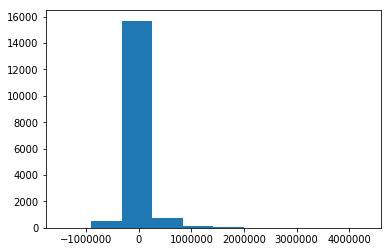

In [49]:
#Histogram of residuals
plt.hist(Mod2_version1_resid)
plt.show()

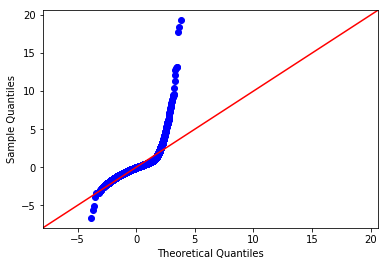

In [50]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version1_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Model 2 - V2

Will drop variables with P-values > 0.05 (will have to split training/test data again after dropping variable) and will log transform variables to see if residuals follow a normal distribution

In [51]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Vashon Island'], axis=1) #dropping due to p-value

In [52]:
#Split data into train/test after dropping new variable
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 19) (17136,)
(4284, 19) (4284,)


In [53]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

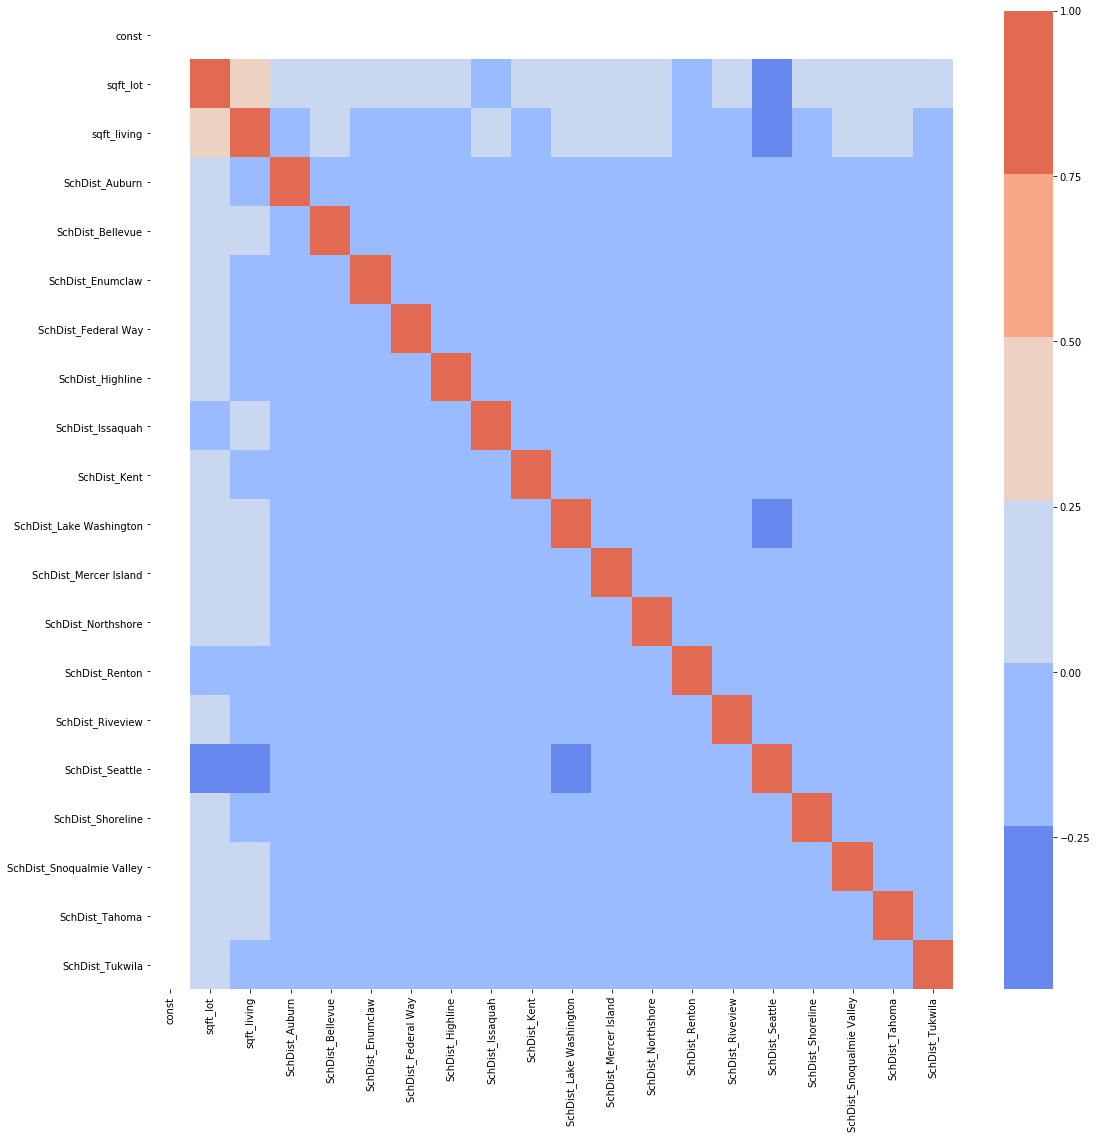

In [54]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

No multicollinearity found after correlation analysis via heatmap

In [55]:
#Generate version2
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     2639.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:17:25   Log-Likelihood:                -1538.5
No. Observations:               17136   AIC:                             3117.
Df Residuals:                   17116   BIC:                             3272.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.7750      0.051    133.125      0.000       6.675       6.875
sqft_lot                      0.0441      0.003     16.030      0.000       0.039       0.049
sqft_living                   0.7740      0.005    145.754      0.000       0.764       0.784
SchDist_Auburn               -0.4669      0.030    -15.320      0.000      -0.527      -0.407
SchDist_Bellevue              0.3717      0.029     12.908      0.000       0.315       0.428
SchDist_Enumclaw             -0.3295      0.032    -10.348      0.000      -0.392      -0.267
SchDist_Federal Way          -0.4631      0.029    -16.099      0.000      -0.519      -0.407
SchDist_Highline             -0.2061      0.030     -6.917      0.000      -0.265      -0.148
SchDist_Issaquah              0.1150      0.030      3.843      0.000       0.056       0.174
SchDist_Kent                 -0.3934      0.029    -13.746      0.000      -0.450      -0.337
SchDist_Lake Washington       0.1771      0.028      6.259      0.000       0.122       0.233
SchDist_Mercer Island         0.5392      0.033     16.366      0.000       0.475       0.604
SchDist_Northshore           -0.0221      0.029     -0.757      0.449      -0.079       0.035
SchDist_Renton               -0.2085      0.029     -7.219      0.000      -0.265      -0.152
SchDist_Riveview             -0.1868      0.033     -5.739      0.000      -0.251      -0.123
SchDist_Seattle               0.2865      0.028     10.117      0.000       0.231       0.342
SchDist_Shoreline             0.0537      0.030      1.803      0.071      -0.005       0.112
SchDist_Snoqualmie Valley    -0.0927      0.030     -3.073      0.002      -0.152      -0.034
SchDist_Tahoma               -0.3189      0.030    -10.546      0.000      -0.378      -0.260
SchDist_Tukwila              -0.4198      0.033    -12.727      0.000      -0.484      -0.355
==============================================================================
Omnibus:                      684.457   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2006.234
Skew:                           0.126   Prob(JB):                         0.00
Kurtosis:                       4.657   Cond. No.                         693.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot residuals of version2 to see if they follow a normal distribution

In [56]:
Mod2_version2_resid = linreg.resid

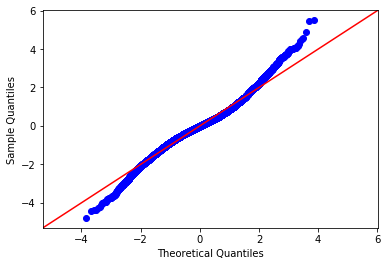

In [57]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version2_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Model 2 - V3 ---> SELECTED MODEL

Will drop variables with P-values > 0.05 from version 2. Follow same steps from Model 2 version 2

In [58]:
#Select the dataframe for Model 1: dummy variables for every zipcode
df_model2 = df3[['price', 'sqft_lot', 'sqft_living']].copy()
df_model2 = pd.concat([df_model2, School_District_dummies], axis=1) 
df_model2 = df_model2.drop(['SchDist_Skykomish'], axis=1) #dropped the School Dist with lowest data available since we created categories
df_model2 = df_model2.drop(['SchDist_Vashon Island'], axis=1) #dropping due to p-value from version 1
df_model2 = df_model2.drop(['SchDist_Northshore'], axis=1) #dropping due to p-value from version 2

In [59]:
#Split data into train/test after dropping new variable
y= df_model2['price']
x= df_model2.drop(['price'], axis=1)

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

X=sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

(17136, 18) (17136,)
(4284, 18) (4284,)


In [60]:
#Log transform continuous variables to see if residuals follow a normal distribution
for feat in ['sqft_lot', 'sqft_living']:
    X[feat] = X[feat].map(lambda x: np.log(x))

y_train = y_train.map(lambda x: np.log(x))

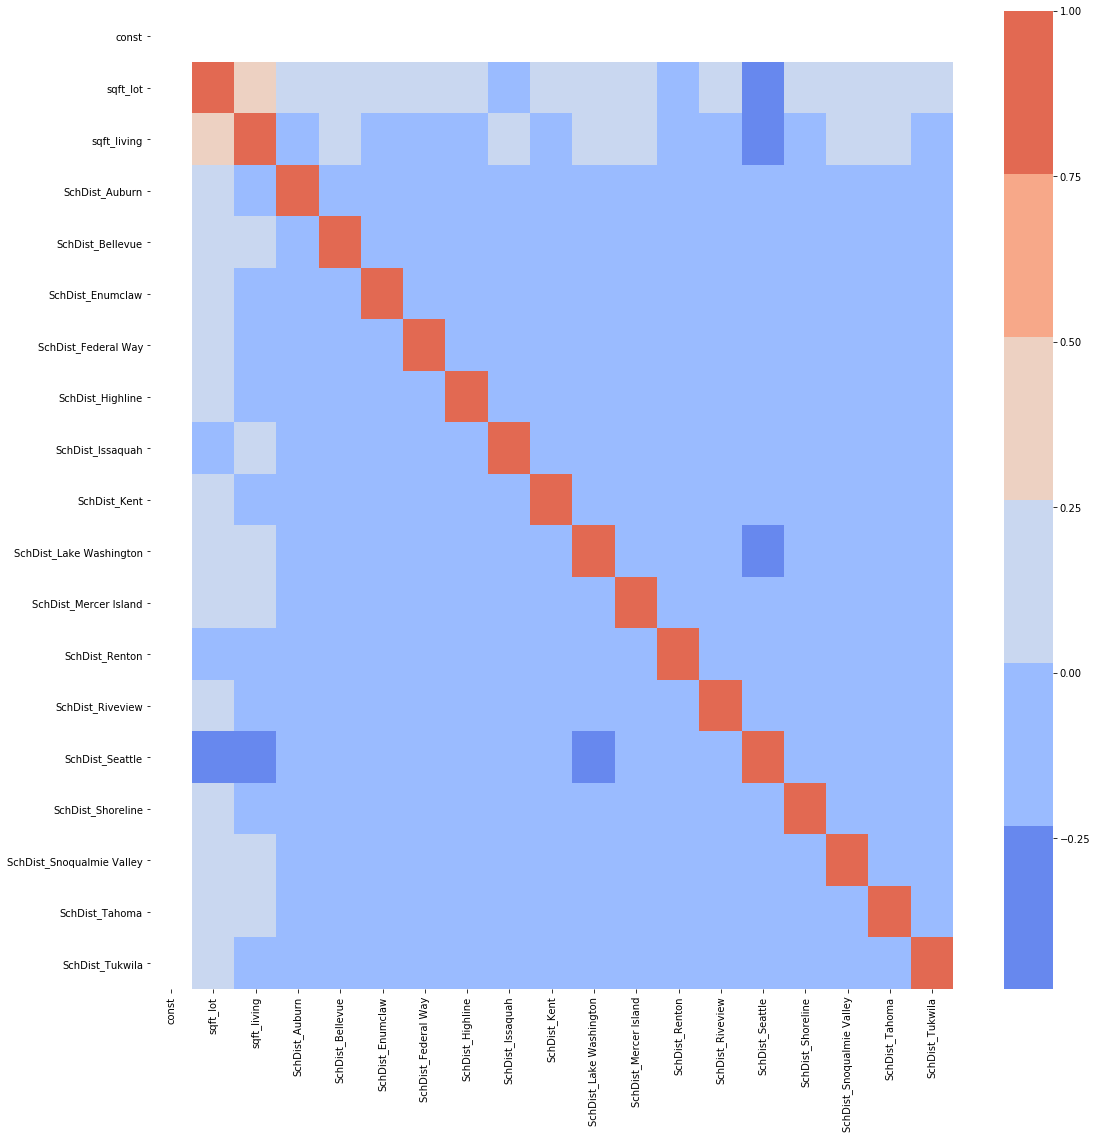

In [61]:
#Heatmap to check multicollinearity
corr = X.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, fmt='.1g', cmap=sns.color_palette('coolwarm'))
plt.show()

In [62]:
#Generate version3
linreg = sm.OLS(y_train,X).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     2807.
Date:                Tue, 30 Jul 2019   Prob (F-statistic):               0.00
Time:                        23:17:27   Log-Likelihood:                -1638.5
No. Observations:               17136   AIC:                             3315.
Df Residuals:                   17117   BIC:                             3462.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         6.7371      0.044    154.679      0.000       6.652       6.822
sqft_lot                      0.0474      0.003     17.325      0.000       0.042       0.053
sqft_living                   0.7728      0.005    146.279      0.000       0.762       0.783
SchDist_Auburn               -0.4502      0.015    -29.129      0.000      -0.481      -0.420
SchDist_Bellevue              0.3982      0.012     32.864      0.000       0.374       0.422
SchDist_Enumclaw             -0.3176      0.019    -16.892      0.000      -0.354      -0.281
SchDist_Federal Way          -0.4449      0.012    -36.233      0.000      -0.469      -0.421
SchDist_Highline             -0.1887      0.015    -12.892      0.000      -0.217      -0.160
SchDist_Issaquah              0.1339      0.014      9.266      0.000       0.106       0.162
SchDist_Kent                 -0.3812      0.012    -32.189      0.000      -0.404      -0.358
SchDist_Lake Washington       0.1939      0.011     17.750      0.000       0.172       0.215
SchDist_Mercer Island         0.5540      0.020     27.524      0.000       0.515       0.593
SchDist_Renton               -0.1929      0.012    -15.585      0.000      -0.217      -0.169
SchDist_Riveview             -0.1636      0.019     -8.464      0.000      -0.201      -0.126
SchDist_Seattle               0.3081      0.011     29.106      0.000       0.287       0.329
SchDist_Shoreline             0.0665      0.015      4.540      0.000       0.038       0.095
SchDist_Snoqualmie Valley    -0.0763      0.015     -4.969      0.000      -0.106      -0.046
SchDist_Tahoma               -0.3022      0.015    -19.685      0.000      -0.332      -0.272
SchDist_Tukwila              -0.3995      0.021    -19.475      0.000      -0.440      -0.359
==============================================================================
Omnibus:                      712.167   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2059.038
Skew:                           0.154   Prob(JB):                         0.00
Kurtosis:                       4.670   Cond. No.                         276.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot residuals of version3 to see if they follow a normal distribution

In [63]:
Mod2_version3_resid = linreg.resid

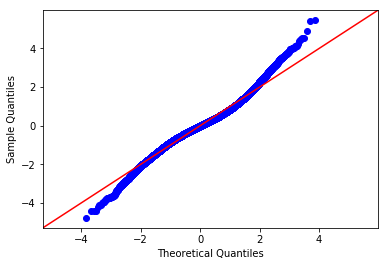

In [64]:
#QQ Plot of residuals
sm.graphics.qqplot(Mod2_version3_resid, dist = stats.norm, line = '45', fit = True)
plt.show()

#### Model 2 - V4

Will perform Stepwise selection to see if the current model can be simplified

In [65]:
result = stepwise_selection(X, y_train, verbose = True)
print('resulting features:')
print(result)

Add  sqft_living                    with p-value 0.0
Add  SchDist_Seattle                with p-value 0.0
Add  const                          with p-value 0.0
Add  SchDist_Bellevue               with p-value 0.0
Add  SchDist_Lake Washington        with p-value 0.0
Add  SchDist_Mercer Island          with p-value 2.29968e-289
Add  SchDist_Issaquah               with p-value 4.55393e-176
Add  SchDist_Shoreline              with p-value 1.26864e-149
Add  SchDist_Federal Way            with p-value 2.70658e-115
Add  SchDist_Kent                   with p-value 6.49527e-106
Add  SchDist_Auburn                 with p-value 9.66634e-98
Add  sqft_lot                       with p-value 3.3344e-81
Add  SchDist_Tukwila                with p-value 5.77721e-36
Add  SchDist_Tahoma                 with p-value 1.49399e-35
Add  SchDist_Enumclaw               with p-value 1.45515e-30
Add  SchDist_Renton                 with p-value 1.71049e-25
Add  SchDist_Highline               with p-value 6.40259e-26

In [66]:
feature_list = ['sqft_living', 'SchDist_Federal Way', 'SchDist_Seattle', 'SchDist_Bellevue', 'const', 'SchDist_Lake Washington', 'SchDist_Mercer Island', 'SchDist_Kent', 'SchDist_Auburn', 'SchDist_Issaquah', 'SchDist_Shoreline', 'sqft_lot', 'SchDist_Tukwila', 'SchDist_Tahoma', 'SchDist_Enumclaw', 'SchDist_Renton', 'SchDist_Highline', 'SchDist_Riveview', 'SchDist_Snoqualmie Valley']

No variables will be disposed due to Stepwise selection; therefore, the final Model to be used is **Model 2 V3**.

### 2.2.3 Test Model

Will test Q1 Model 2 - Version 3 as this model presented a reasonable QQ plot and good indicators from the OLS Summary

In [67]:
#Transform test variables before testing the model
for feat in ['sqft_lot', 'sqft_living']:
    X_test[feat] = X_test[feat].map(lambda x: np.log(x))

y_test = y_test.map(lambda x: np.log(x))

In [68]:
#linreg variable has the model from version 3
y_hat_train = linreg.predict(X)
y_hat_test = linreg.predict(X_test)

In [69]:
#get the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

Compare your predicted values, $\hat y$ with the actual value, $y$ using the Mean Squared Error from both training and test dataset
        
   MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

In [70]:
#Calculate the Mean Squarred Error
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.07088911001107227
Test Mean Squarred Error: 0.0689603917129916


### 2.2.4 Conclusions: Model 2

In general, R-squared and Adjusted R-squared showed good numbers (0.748), Model 2 V3 QQ plot showed satisfactory results as the residuals followed a close linear distribution. 
 
Also, the difference of the Mean Squared Error between train data and test data was small, therefore Model 2 V3 was fitting to our data. 
 
**Train Mean Squarred Error:** 0.07014580077234954

**Test Mean Squarred Error:** 0.07197066945575076


## 2.3 Model 2 V3- Data Visualization

-----Plotting predicted values for house price using Model 2.

In [71]:
x = df_model2.drop(['price'], axis=1)
X = sm.add_constant(x)

In [72]:
predicted_price = linreg.predict(X)

In [73]:
predicted_price = predicted_price.to_frame()

In [74]:
predicted_price.rename(columns={0: "predicted_price"}, inplace=True)

In [75]:
lat_long = df3[['lat', 'long']].copy()

In [76]:
df5 = df_model2.merge(lat_long, how='inner', left_index=True, right_index=True)

In [77]:
df6 = df5.merge(predicted_price, how='inner', left_index=True, right_index=True)

In [78]:
scaled_pred_price = (df6['predicted_price']-min(df6['predicted_price']))/(max(df6['predicted_price'])-min(df6['predicted_price']))
scaled_living = (df6['sqft_living']-min(df6['sqft_living']))/(max(df6['sqft_living'])-min(df6['sqft_living']))
df6['scaled_pred_price'] = scaled_pred_price
df6['scaled_sqft_living'] = scaled_living

In [79]:
scaled_living = (df6['sqft_living']-min(df6['sqft_living']))/(max(df6['sqft_living'])-min(df6['sqft_living']))
df6['scaled_sqft_living'] = scaled_living

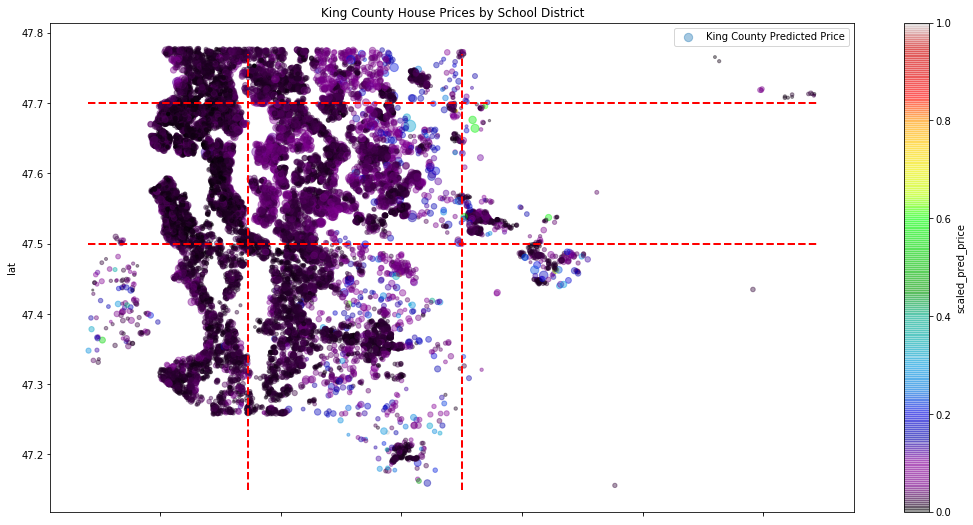

In [80]:
df6.plot(kind="scatter", x="long", y="lat", label="King County Predicted Price", s=df6['sqft_living']/100,
    c='scaled_pred_price', cmap=plt.get_cmap("nipy_spectral"),
    colorbar=True, alpha=0.4, figsize=(18,9),
)

plt.plot((-122.52, -121.31), (47.7, 47.7), 'r--', lw=2)
plt.plot((-122.52, -121.31), (47.5, 47.5), 'r--', lw=2)
plt.plot((-122.255, -122.255), (47.15, 47.77), 'r--', lw=2)
plt.plot((-121.9, -121.9), (47.15, 47.77), 'r--', lw=2)
plt.title("King County House Prices by School District")
plt.legend()
plt.show()

Above scatter plot shows lighter colors in school districts Enumclaw, Riverview, Vashon Island. None of those school districts were in our top 7 from our Model. Will have to confirm if sqft_living or sqft_lot have something to do with this difference in price.

-----Plotting House sqft based on School District

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

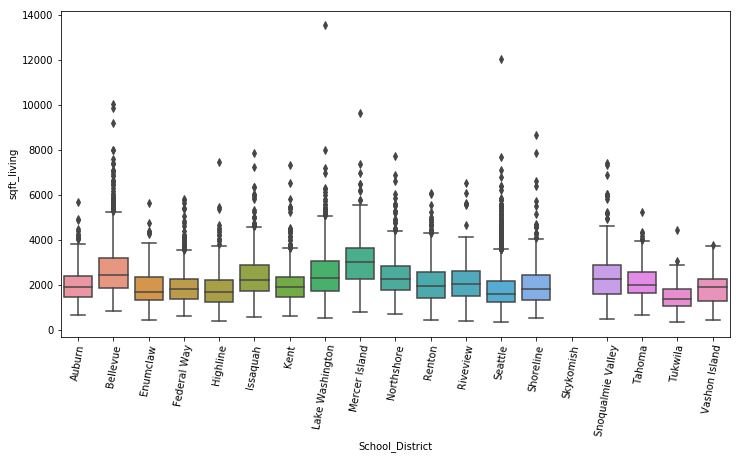

In [81]:
#Plot sqft_living for each school district to have a reference of the difference in colors in map
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="School_District", y="sqft_living", data=df3)
plt.xticks(rotation=80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

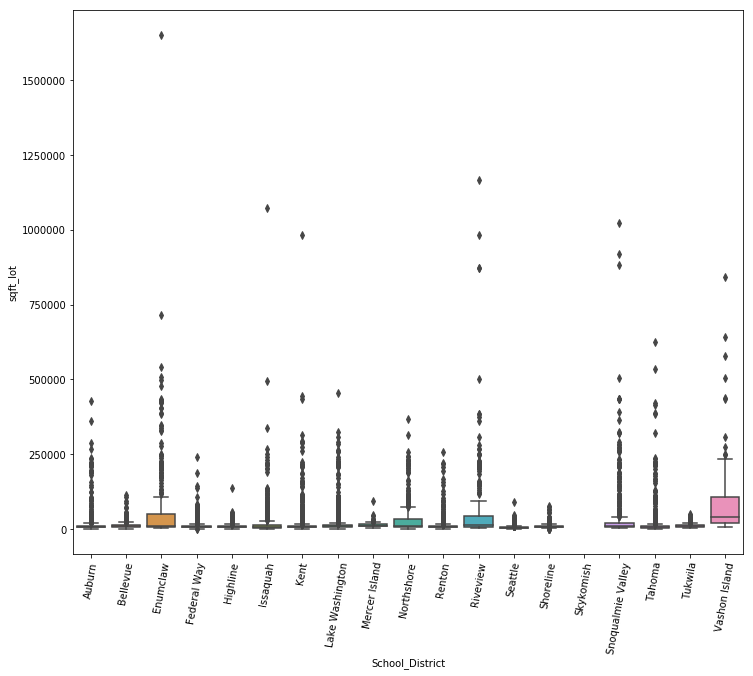

In [82]:
#Plot sqft_lot for each school district to have a reference of the difference in colors in map
plt.figure(figsize=(12, 10))
ax = sns.boxplot(x="School_District", y="sqft_lot", data=df3)
plt.xticks(rotation=80)

Above graphs help us confirm that the sqft_lot in school districts Enumclaw, Riverview, Vashon Island have significantly bigger lots. Sqft living is actually smaller or comparable to top model School Districts, therefore, sqft lot is causing the lighter color scheme in the scatter plot.